In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [7]:
df = pd.read_csv('data/Cropped-Faces-DataFrame-from-4.7.0.csv', index_col='index')
path_to_cropped_faces = 'data/input/Cropped Arrays'

We Have our final cropped faces and their numpy arrays from index.4.7.0:
Let us start to do some prediction!

You Should Unzip the arrays ! if you are not yet.

In [4]:
#!unzip -q 'data/Cropped Arrays.4.7.0.zip' -d 'data/input/'

Loaded array for face_0.jpg from data/output/csv/Cropped Arrays/face_0.jpg_0.npy

  -->> Emotion Label -->>  0 


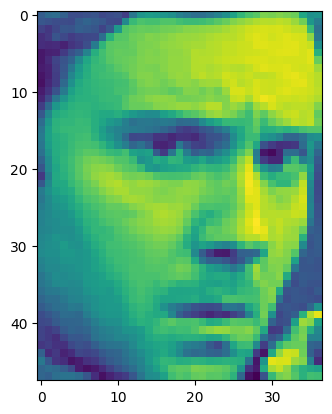

Loaded array for face_4.jpg from data/output/csv/Cropped Arrays/face_4.jpg_4.npy

  -->> Emotion Label -->>  6 


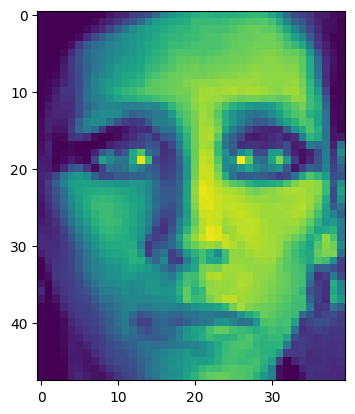

Loaded array for face_5.jpg from data/output/csv/Cropped Arrays/face_5.jpg_5.npy

  -->> Emotion Label -->>  2 


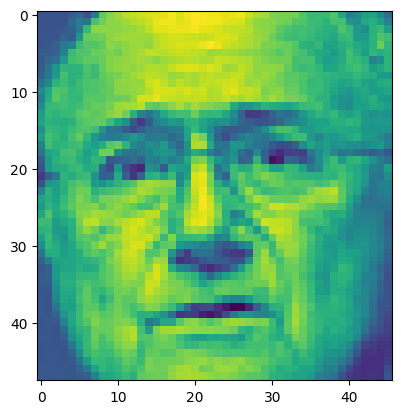

In [12]:
def load_array_from_path(path):
    return np.load(path)

i = 0
lim = 3
# Loop through the DataFrame and load arrays
for idx, row in df.iterrows():
    i += 1
    array_path = row['pixel']
    array = load_array_from_path(f"{path_to_cropped_faces}/face_{idx}.jpg_{idx}.npy")
    print(f"Loaded array for {row['name']} from {array_path}" )
    print('\n', f" -->> Emotion Label -->>  {row['emotion']} ")
    plt.imshow(array)
    plt.show()
    if i == lim:
      break


We Need our other model to detect the facial part to use for our delaunay jobs!! :)

#### predictor path :
#### frontal face detection object :

In [16]:
import dlib
import os
#import cv2
#import dlib
#import warnings
#import numpy as np
#import pandas as pd
#from PIL import Image
#import mediapipe as mp
#from main import Stats
#from main import Utilities
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
#from google.colab.patches import cv2_imshow

In [14]:
predictor_path = "models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)

detector = dlib.get_frontal_face_detector()

In [203]:
global global_detector_keeper
global_detector_keeper = []

In [181]:

def plot_delaunay(points, delaunay, ax):
    for simplex in delaunay.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], 'k-')


def triangular_detection_of_facial_parts(id,
                                         image_array = None,
                                         image_path = None,
                                         show_fig = True,
                                         save_fig = False,
                                         save_path = 'data/output/pic/triangular_detection_of_facial_parts/'):
    if image_array is None and image_path is not None:
        img = Image.open(image_path)
        img = np.array(img)
    elif image_array is not None and image_path is None:
      img = image_array
    else:
      raise AssertionError(" You must provide either image_array or image_path to this method could work!")
    ax = plt.gca()
    ax.imshow(img)
    detections = detector(img, 1)
    for k, d in enumerate(detections):
        shape = predictor(img, d)
        points = np.array([[p.x, p.y] for p in shape.parts()])
        ax.scatter(points[:, 0], points[:, 1], c='r', s=10)
        delaunay = Delaunay(points)
        global_detector_keeper.append(delaunay)
        plot_delaunay(points, delaunay, ax)
    plt.axis('off')
    if save_fig:
      path_to_save = os.path.join(save_path, f'image{id}.jpg')
      try:
        os.mkdir(save_path)
      except:
        pass
      plt.savefig(path_to_save)
    if show_fig:
      plt.show()
    else:
      return

In [ ]:
def load_array_from_path(path):
    return np.load(path)

for idx, row in df.iterrows():
    array_path = row['pixel']
    array = load_array_from_path(f"{path_to_cropped_faces}/face_{idx}.jpg_{idx}.npy")
    plt.imshow(array)
    plt.show()


In [200]:
array_example = load_array_from_path(f"{path_to_cropped_faces}/face_40.jpg_40.npy")

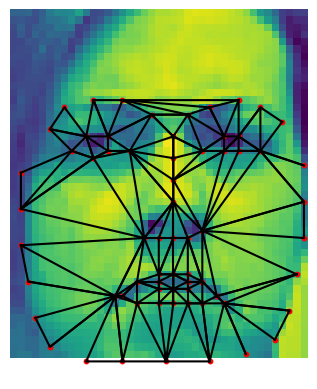

In [204]:
triangular_detection_of_facial_parts(image_array = array_example, id = 0)

باید ببینیم هر دلونی چه نقاطی را به ما برمیگرداند

اینطور که پیداست اندیس هایی مشخصا برای چشم ها ولب ها موجود است و ما همین را میخواهیم

یک شی گلوبال ساده تعریف کردیم که بعدا آن را کامنت خواهم کرد زیرا فقط برای تست است

این شی به نام گلوبال دیتکتور کیپر قرار است یک شی از کلاس دلونی را نگه دارد و ما از تحلیل آن بهره خواهیم برد

In [205]:
temp = global_detector_keeper[0]

گلوبال دیتکتور یک لیست است و اولین و تنها محتوی آن یک شی از کلاس دلونی است

 که در سلول قبلی در لا به لای خصوص تابع آن را جای گزاری کردم که اپند شود به گلوبال ما

خیلی ساده اول پلات کنیم نقاطشو

In [ ]:
#from matplotlib import colors
#colors.get_named_colors_mapping()

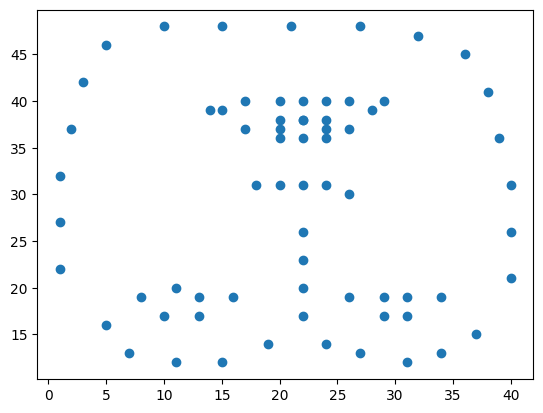

In [206]:
plt.scatter(temp.points[:,0],temp.points[:,1])
plt.show()

خب باید نسبت به خط ایکس ها قرینه بشه

ینی باید وای هاش  رو در منفی ضرب کنیم

In [207]:
temp.points[:,1] = - temp.points[:,1]

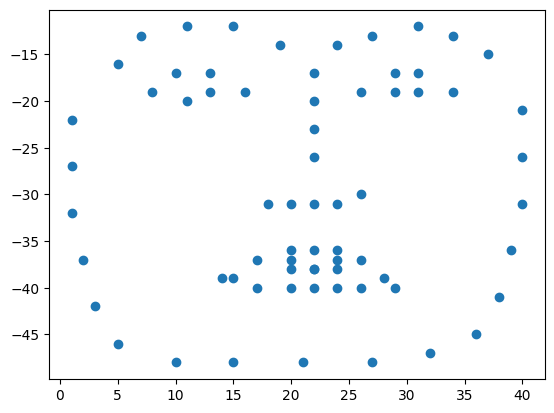

In [208]:
plt.scatter(temp.points[:,0],temp.points[:,1])
plt.show()

برسی های زیر رو مرحله به مرحله انجام دادیم تا فهمیدیم که این کلاس دلونی عزیز اندیس هارو

با ترتیب و نظم مشخصی ارائه میده!

ببیننید

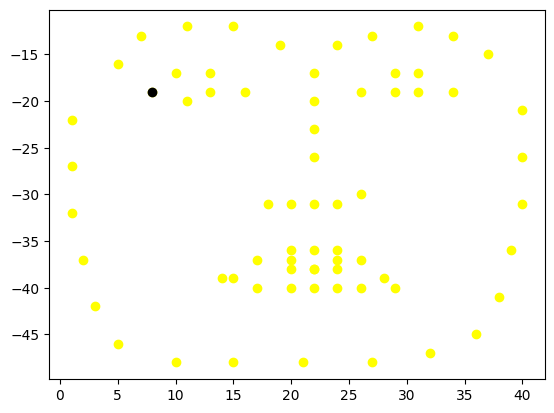

In [209]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36,0],temp.points[36,1], c = 'black')
plt.show()

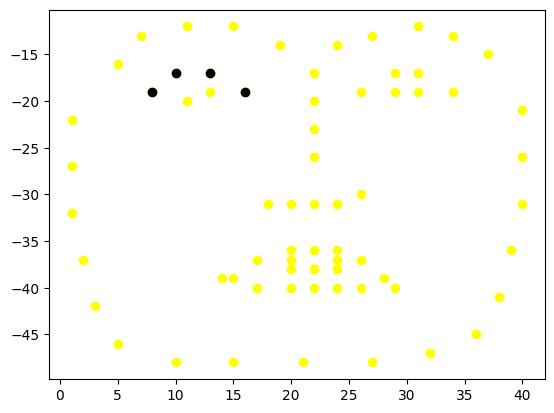

In [210]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36,0],temp.points[36,1], c = 'black')
plt.scatter(temp.points[37,0],temp.points[37,1], c = 'black')
plt.scatter(temp.points[38,0],temp.points[38,1], c = 'black')
plt.scatter(temp.points[39,0],temp.points[39,1], c = 'black')
plt.show()

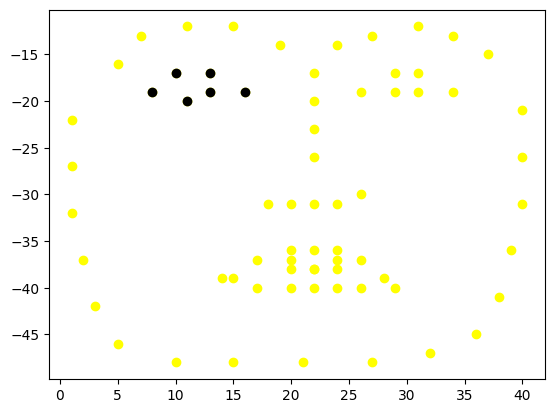

In [211]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36,0],temp.points[36,1], c = 'black')
plt.scatter(temp.points[37,0],temp.points[37,1], c = 'black')
plt.scatter(temp.points[38,0],temp.points[38,1], c = 'black')
plt.scatter(temp.points[39,0],temp.points[39,1], c = 'black')
plt.scatter(temp.points[40,0],temp.points[40,1], c = 'black')
plt.scatter(temp.points[41,0],temp.points[41,1], c = 'black')
plt.show()

با ادامه برسی ها فهمیدیم که :

اندیس های چشم راست همیشه
۴۲ 
تا
۴۸

اندیس های چشم چپ از ۳۶ 
تا ۴۲

و لب ها از ۴۸ تا 60

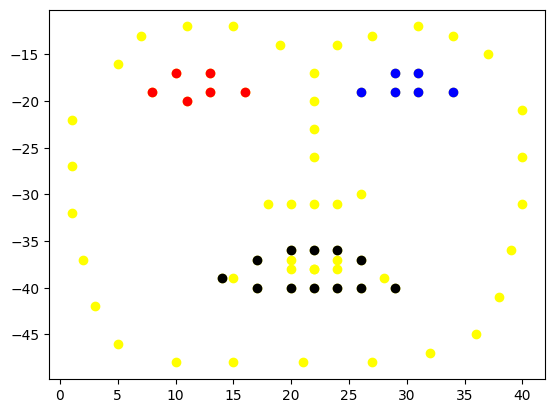

In [213]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36:42,0],temp.points[36:42,1], c = 'red')
plt.scatter(temp.points[42:48,0],temp.points[42:48,1], c = 'blue')
plt.scatter(temp.points[48:60,0],temp.points[48:60,1], c = 'black')
plt.show()

In [ ]:
temp

In [33]:
from SimpleS.Points import Triangle

In [214]:
from SimpleS.Points import Triangle
Triangle.calculate_triangle_area()

TypeError: calculate_triangle_area() missing 3 required positional arguments: 'P1', 'P2', and 'P3'

In [37]:
global_detector_keeper = np.asarray(global_detector_keeper)

In [139]:
temp.points[:,1] = -temp.points[:,1]

In [77]:
len(temp.points)

68

In [99]:
len(c_)

38

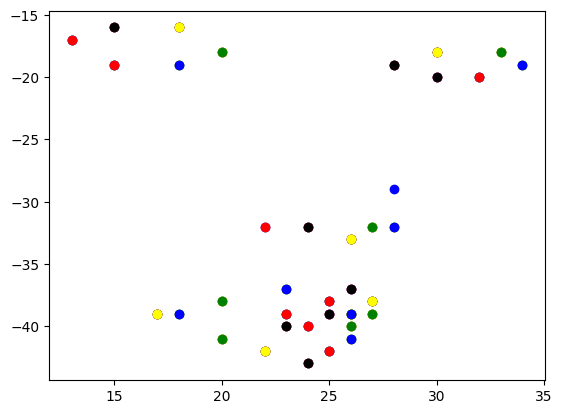

In [101]:
k = 0
for i in range(30, 68):
    
    j = i+3
    
    plt.scatter(temp.points[i:j,0],temp.points[i:j,1], c = c_[k])
    k+=1

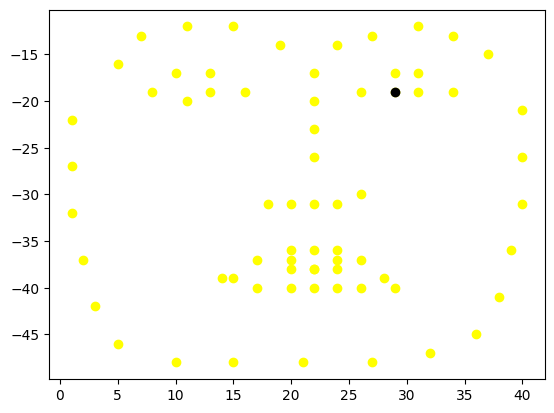

In [222]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
#plt.scatter(temp.points[36,0],temp.points[36,1], c = 'black')
plt.scatter(temp.points[47,0],temp.points[47,1], c = 'black')
#plt.scatter(temp.points[38,0],temp.points[38,1], c = 'black')
#plt.scatter(temp.points[39,0],temp.points[39,1], c = 'black')
#plt.scatter(temp.points[40,0],temp.points[40,1], c = 'black')
#plt.scatter(temp.points[41,0],temp.points[41,1], c = 'black')


In [ ]:
Triangle.calculate_triangle_area()

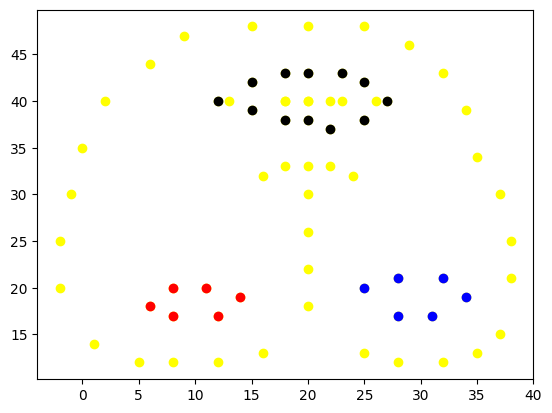

In [135]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36:42,0],temp.points[36:42,1], c = 'red')
plt.scatter(temp.points[42:48,0],temp.points[42:48,1], c = 'blue')
plt.scatter(temp.points[48:60,0],temp.points[48:60,1], c = 'black')

In [125]:
temp.points

array([[-2., 20.],
       [-2., 25.],
       [-1., 30.],
       [ 0., 35.],
       [ 2., 40.],
       [ 6., 44.],
       [ 9., 47.],
       [15., 48.],
       [20., 48.],
       [25., 48.],
       [29., 46.],
       [32., 43.],
       [34., 39.],
       [35., 34.],
       [37., 30.],
       [38., 25.],
       [38., 21.],
       [ 1., 14.],
       [ 5., 12.],
       [ 8., 12.],
       [12., 12.],
       [16., 13.],
       [25., 13.],
       [28., 12.],
       [32., 12.],
       [35., 13.],
       [37., 15.],
       [20., 18.],
       [20., 22.],
       [20., 26.],
       [20., 30.],
       [16., 32.],
       [18., 33.],
       [20., 33.],
       [22., 33.],
       [24., 32.],
       [ 6., 18.],
       [ 8., 17.],
       [12., 17.],
       [14., 19.],
       [11., 20.],
       [ 8., 20.],
       [25., 20.],
       [28., 17.],
       [31., 17.],
       [34., 19.],
       [32., 21.],
       [28., 21.],
       [12., 40.],
       [15., 39.],
       [18., 38.],
       [20., 38.],
       [22.,

In [ ]:
#for i in data_fixed.index:
#  triangular_detection_of_facial_parts(image_array=data_fixed.loc[i, 'pixels'],id =i)

In [ ]:

def plot_delaunay(points, delaunay, ax):
    for simplex in delaunay.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], 'k-')


def get_delaunay_for_part(points, part_indices):
    part_points = points[part_indices]
    return Delaunay(part_points)


def detect_faces_and_triangulate_parts(image_path = None, image_array = None, return_detected_info = False):
    #img = Image.open(image_path)
    #img = np.array(img)
    img = image_array
    ax = plt.gca()
    ax.imshow(img)

    detections = detector(img, 1)
    for k, d in enumerate(detections):
        shape = predictor(img, d)
        points = np.array([[p.x, p.y] for p in shape.parts()])
        ax.scatter(points[:, 0], points[:, 1], c='r', s=10)

        #temp1 = np.arange(24, 36)
        eye_indices = np.arange(36, 48)
        lip_indices = np.arange(48, 68)
        #temp2 = np.arange(68, 80)

        #eye_delaunay = get_delaunay_for_part(points, temp1)
        #lip_delaunay = get_delaunay_for_part(points, temp2)
        eye_delaunay = get_delaunay_for_part(points, eye_indices)
        lip_delaunay = get_delaunay_for_part(points, lip_indices)


        plot_delaunay(points, eye_delaunay, ax)
        plot_delaunay(points, lip_delaunay, ax)

    plt.axis('off')
    plt.show()

#

In [ ]:
for i in data_fixed.index:
  triangular_detection_of_facial_parts(image_array=data_fixed.loc[i, 'pixels'],id =i)